In [107]:
%reset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [108]:
#read data
data = pd.read_pickle('./data/properties.pkl')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1421
Data columns (total 7 columns):
ID          1422 non-null object
area        306 non-null float64
garage      1422 non-null int64
location    1422 non-null category
pool        1422 non-null int64
price       1123 non-null float64
type        1422 non-null category
dtypes: category(2), float64(2), int64(2), object(1)
memory usage: 70.3+ KB


# Exploring the Data

## Average Value of properties with pools

In [109]:
#create a dataset for those houses with pools
have_pools = data['pool']==1
pools = data[have_pools]

#create a dataset for those houses without pools
dont_have_pools = data['pool']==0
no_pools = data[dont_have_pools]

print('Average value of properties with pools: ' + str(pools['price'].mean()))
print('Average value of properties without pools: ' + str(no_pools['price'].mean()))

Average value of properties with pools: 818616.0714285715
Average value of properties without pools: 342582.97725024726


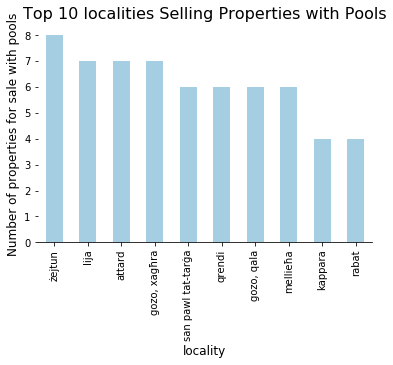

In [75]:
#pools['location'].value_counts()
ax = pools['location'].value_counts()[0:10].plot(kind='bar', colormap='Paired')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('locality',size=12)
ax.set_ylabel('Number of properties for sale with pools',size=12)
ax.set_title('Top 10 localities Selling Properties with Pools', size=16)

ax.get_figure().savefig('./plots/top_localities_pools.png', bbox_inches='tight')

## Locality with highest number of properties for sale

In [110]:
no_NA = data['location'] != 'NA'
localities = data[no_NA]

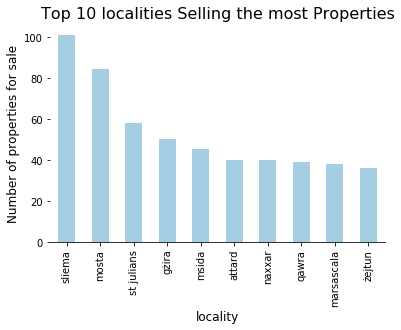

In [77]:
ax = localities['location'].value_counts()[0:10].plot(kind='bar', colormap='Paired')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('locality',size=12)
ax.set_ylabel('Number of properties for sale',size=12)
ax.set_title('Top 10 localities Selling the most Properties', size=16)

ax.get_figure().savefig('./plots/top_localities.png', bbox_inches='tight')

## Most Expensive locality

In [111]:
localities = localities.dropna()

In [112]:
#A small property will not be less than 35 sq. m
area_without_outliers = localities['area'] >= 35
localities = localities[area_without_outliers]

In [113]:
#Work out price per square meter
localities['price per sq. meter'] = localities['price']/localities['area']

In [114]:
#group by locality and get the mean
means = localities.groupby(['location']).mean()

In [115]:
#sort means by price per sq. m to get the top values
means.sort_values(['price per sq. meter'], ascending = False)

,area,garage,pool,price,price per sq. meter
location,,,,,
pender gardens,55.000000,0.000000,0.000000,1.200000e+06,21818.181818
tarxien,35.000000,0.000000,0.000000,4.200000e+05,12000.000000
naxxar,145.000000,0.000000,0.500000,1.127500e+06,7572.619048
ta' xbiex,285.000000,0.000000,0.000000,1.590000e+06,5578.947368
siġġiewi,142.500000,0.000000,0.000000,5.767500e+05,5509.647852
wardija,200.000000,0.000000,1.000000,1.000000e+06,5000.000000
bidnija,438.333333,0.666667,1.000000,1.345000e+06,4717.073171
mqabba,183.000000,0.500000,0.500000,5.060000e+05,4694.393939
valletta,91.000000,0.000000,0.000000,4.410000e+05,4499.214055


## Analysis on type of property

In [116]:
types = data.dropna().groupby(['type']).mean()
types.head()

,area,garage,pool,price
type,,,,
apartment,141.505155,0.195876,0.010309,3.535309e+05
block,70.000000,0.000000,0.000000,1.250000e+06
flat,380.000000,0.500000,0.500000,9.447500e+05
house,341.927536,0.159420,0.173913,5.684783e+05
maisonette,167.520000,0.200000,0.120000,3.400000e+05


In [117]:
types = data.dropna().groupby(['type'])

In [128]:
selected = (data['type'] == 'apartment')
apartments = data[selected]

selected = (data['type'] == 'house')
houses = data[selected]

Text(0.5,1,'Density Plots for the Prices of Houses and Apartments')

<Figure size 432x288 with 0 Axes>

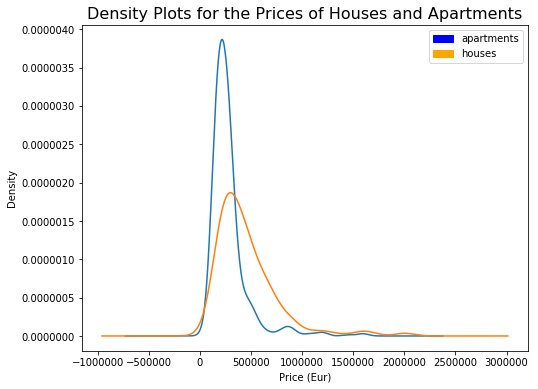

In [135]:
import matplotlib.patches as mpatches

plt.figure()
fig, ax = plt.subplots(figsize=(8,6))
a = apartments['price'].plot(kind='kde', ax=ax)
b = houses['price'].plot(kind='kde', ax=ax)

red_patch = mpatches.Patch(color='blue', label='apartments')
orange_patch = mpatches.Patch(color='orange', label='houses')
plt.legend(handles=[red_patch, orange_patch])

ax.set_xlabel('Price (Eur)')
ax.set_title('Density Plots for the Prices of Houses and Apartments', size=16)

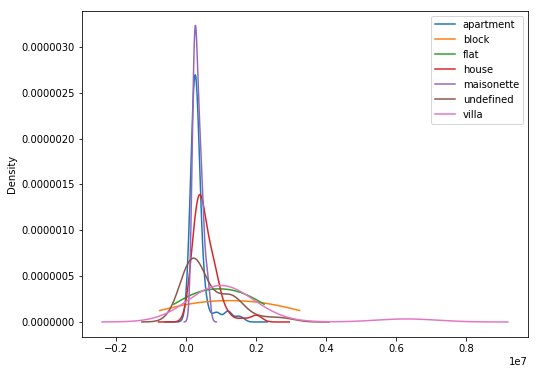

In [91]:
fig, ax = plt.subplots(figsize=(8,6))
types['price'].plot(kind='kde', ax=ax)

ax.legend()